## НИС 24/25, ВСН

## Семинар 1

### Подготовил: kiril



### 1. Что такое скрепинг и парсинг?

**Скрепинг** и **парсинг** — это два важных процесса, которые применяются для извлечения данных с веб-страниц.

#### Скрепинг

**Скрепинг** (или веб-скрепинг) — это процесс автоматического извлечения данных с веб-сайтов. Цель скрепинга — собрать данные из определенного источника в удобном формате для дальнейшего анализа, обработки или хранения. Веб-скрепинг может применяться для:

- Сбора информации о товарах и ценах с сайтов интернет-магазинов,
- Получения актуальных новостей с новостных ресурсов,
- Сбора статистики с различных информационных порталов.

С помощью скрепинга можно автоматически обойти множество страниц, используя специально написанные программы (скрипты). Эти программы используют HTTP-запросы и получают HTML-код страницы, который затем анализируется для извлечения нужных данных.

#### Парсинг

**Парсинг** — это процесс обработки и извлечения данных из структуры HTML-кода или другого текста. Парсинг следует за скрепингом, когда мы уже получили HTML-код страницы. Основная цель парсинга — "понять" содержимое страницы и выделить из него конкретные данные.

Парсинг включает:

- **Анализ HTML-структуры страницы**: Мы можем работать с HTML-тегами и атрибутами, чтобы точно выделить необходимые данные, такие как текст, ссылки, изображения, таблицы и т.д.
- **Извлечение данных по определенным шаблонам**: Например, можно извлечь все заголовки новостей, даты, цены или другие структурированные элементы.

Парсинг часто осуществляется с использованием библиотек Python, таких как **BeautifulSoup**, **lxml** или **re** (для регулярных выражений), которые помогают легко находить и извлекать нужные данные из HTML.

#### Разница между скрепингом и парсингом

- **Скрепинг** — это процесс получения HTML-кода страницы с сайта.
- **Парсинг** — это извлечение нужной информации из полученного HTML-кода.

Обычно эти процессы идут последовательно: сначала выполняется скрепинг, чтобы получить HTML-код, а затем парсинг для извлечения необходимых данных из этого кода.

#### Пример процесса скрепинга и парсинга

1. **Скрепинг**: Программа отправляет HTTP-запрос на сайт и получает HTML-код страницы.
2. **Парсинг**: С помощью библиотеки, например, BeautifulSoup, программа обрабатывает HTML-код, находит нужные элементы (например, цены или заголовки) и сохраняет их в удобном для работы формате, таком как таблица или файл CSV.

#### Инструменты для скрепинга и парсинга

- **Requests**: библиотека для отправки HTTP-запросов, чтобы получить HTML-код страницы.
- **BeautifulSoup**: библиотека для удобного парсинга HTML и XML документов.
- **Selenium**: инструмент для скрепинга сайтов, где требуется взаимодействие с динамическим контентом.
- **Scrapy**: фреймворк для построения крупных систем скрепинга и парсинга.

Эти процессы позволяют автоматизировать сбор данных и извлечение информации, что особенно полезно при обработке большого объема данных с веб-страниц.


### 2. Примеры наших проектов, где используюся спаршенные данные

1. **База данных публичных ТГ-каналов**: скрепинг постов и метаданных публичных ТГ-каналов.
2. **Строительство религиозных сооружений и электоральнное поведение**: скрепинг сайта temples.ru, сохранение геолокации сооружений и данных о них.
3. **Пункты ТБО и электоральное поведение**: скрепинг карты свалок с сайта Росприроднадзора.
4. **Качество воздуха и электоральное поведение**: использование геолокации УИКов на сайте breezometer для определения качества воздуха рядом с УИКом.


### 3. Pandas

Исследовательская работа как правило, сводится к анализу табличных данных. Начинать мы можем с большого количества сложных таблиц, изображений, текстов или ещё чего-то непростого, но в итоге всё это обычно сводится к одной таблице, где каждый объект описывается набором признаков. Поэтому важно уметь работать с таблицами.

А ещё есть некоторые исследования, показывающие, что в решении задачи интеллектуального анализа данных обычно 20% времени уходит на построение моделей и прочую интересную работу, связанную с тем, что рассказывается у нас на лекциях, а 80% времени специалисты тратят на подготовку и обработку данных. Сюда входит формирование признаков, устранение выбросов и пропусков и т.д. И это тоже, по сути дела, манипуляции с таблицами.

Вывод: важно уметь работать с табличными данными. В Python для этого есть библиотека pandas, которую мы и будем сегодня изучать.

In [6]:
!pip3 install pandas matplotlib numpy --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


Чаще всего название библиотеки при импорте сокращают до "pd":

In [7]:
import pandas as pd

In [8]:
#if one needs to install wget
#!pip install wget

Загрузим данные (обратите внимание, что мы легко читаем xlsx-файлы):

In [9]:
!wget -O '/tmp/Алгоритмы_и_Структуры_Данных_ВСН_2023_4 модуль.xlsx' -q 'https://www.dropbox.com/scl/fi/mjqob6pfs30gp9fq8f8w5/2023-4.xlsx?rlkey=isvudkqzuxpr2rjgqfla9pb6t&st=ty4sasyb&dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой.

Давайте прочтем файл и удалим лишнюю информацию (константы и ненужные данные)

In [ ]:
#  для работы с экселем
!pip3 install openpyxl --break-system-packages

In [13]:
df = pd.read_excel('/tmp/Алгоритмы_и_Структуры_Данных_ВСН_2023_4 модуль.xlsx')
df.dropna(subset='Студент',inplace=True)
df = df[:35]
df.head(5)

,Студент,Codeforces логин,2024-04-06 00:00:00,2024-04-13 00:00:00,2024-04-18 00:00:00,2024-04-27 00:00:00,2024-05-11 00:00:00,2024-05-18 00:00:00,2024-05-25 00:00:00,2024-06-01 00:00:00,...,Бонус ДЗ,Сумма ДЗ,КР 1,Коллоквиум,Сумма КР,Бонусы,Результат для автомата,Экзамен,Результат,Итоговая оценка
0,Андреева Анастасия,Anvvq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000
1,Андреянова Софья,ssonyii,3.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,...,0.0,7.6500,10.0,10.0,10.00,10.0,9.275466,8.0,9.042826,9.042826
2,Ахряпина Мария,MashaAkhr,3.5,2.5,2.0,1.0,2.0,1.5,2.0,1.0,...,0.0,8.7250,6.0,8.5,7.25,0.0,8.026553,0.0,5.618587,8.000000
3,Бельченко Алиса,Belloid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,9.8750,10.0,9.0,9.50,0.0,8.303571,8.0,8.212500,8.212500
4,Белявская Виктория,vssukhova,4.0,1.0,4.0,2.0,2.0,2.0,2.5,2.5,...,0.0,7.5875,8.0,10.0,9.00,10.0,9.006444,0.0,6.454511,8.000000


Посмотрим размер таблицы:

In [14]:
df.shape

(35, 34)

Для начала будем работать с одной таблицей. Теперь данные хранятся в переменной ```df```, которая имеет тип [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

DataFrame можно создать и вручную:

In [15]:
df_temp = pd.DataFrame({
    'AAA': [4, 5, 6, 7], 
    'BBB': [10, 20, 30, 40], 
    'CCC': [100, 50, 'E', -50]
})
df_temp

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,E
3,7,40,-50


DataFrame можно частично отобразить в jupyter-ноутбуке с помощью методов ```head```(первые строки) и ```sample```(случайные строки):

In [16]:
df.head(5)

,Студент,Codeforces логин,2024-04-06 00:00:00,2024-04-13 00:00:00,2024-04-18 00:00:00,2024-04-27 00:00:00,2024-05-11 00:00:00,2024-05-18 00:00:00,2024-05-25 00:00:00,2024-06-01 00:00:00,...,Бонус ДЗ,Сумма ДЗ,КР 1,Коллоквиум,Сумма КР,Бонусы,Результат для автомата,Экзамен,Результат,Итоговая оценка
0,Андреева Анастасия,Anvvq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000
1,Андреянова Софья,ssonyii,3.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,...,0.0,7.6500,10.0,10.0,10.00,10.0,9.275466,8.0,9.042826,9.042826
2,Ахряпина Мария,MashaAkhr,3.5,2.5,2.0,1.0,2.0,1.5,2.0,1.0,...,0.0,8.7250,6.0,8.5,7.25,0.0,8.026553,0.0,5.618587,8.000000
3,Бельченко Алиса,Belloid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,9.8750,10.0,9.0,9.50,0.0,8.303571,8.0,8.212500,8.212500
4,Белявская Виктория,vssukhova,4.0,1.0,4.0,2.0,2.0,2.0,2.5,2.5,...,0.0,7.5875,8.0,10.0,9.00,10.0,9.006444,0.0,6.454511,8.000000


In [17]:
df.sample(5)

,Студент,Codeforces логин,2024-04-06 00:00:00,2024-04-13 00:00:00,2024-04-18 00:00:00,2024-04-27 00:00:00,2024-05-11 00:00:00,2024-05-18 00:00:00,2024-05-25 00:00:00,2024-06-01 00:00:00,...,Бонус ДЗ,Сумма ДЗ,КР 1,Коллоквиум,Сумма КР,Бонусы,Результат для автомата,Экзамен,Результат,Итоговая оценка
32,Тимерханов Артём,TTJC,0.0,0.0,1.0,0.0,0.0,1.5,3.0,3.0,...,0.0,7.1375,8.0,7.0,7.50,0.0,6.987500,6.0,6.691250,6.691250
28,Рыбалко Иван,shlang_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.1500,8.0,8.0,8.00,0.0,5.635714,0.0,3.945000,3.945000
5,Борисенко Семён,vaccinechippedby5g,4.5,2.0,4.0,2.0,2.0,2.0,2.0,3.5,...,0.0,8.3500,6.0,8.0,7.00,10.0,8.507143,0.0,6.105000,8.507143
25,Панин Николай,PaninN83,3.5,1.0,2.0,1.0,2.0,1.5,0.0,4.0,...,0.0,7.3000,8.0,10.0,9.00,0.0,8.134783,0.0,5.694348,8.000000
16,Ленкова Анастасия,Lenkova,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3250,0.0,3.5,1.75,0.0,1.013509,0.0,0.709457,0.709457


DataFrame, по сути, является двумерной таблицей с набором полезных методов. Давайте рассмотрим некоторые из них.

```columns``` — возвращает названия колонок

```dtypes``` — типы колонок

In [18]:
df.columns

Index([               'Студент',       'Codeforces логин',
            2024-04-06 00:00:00,      2024-04-13 00:00:00,
            2024-04-18 00:00:00,      2024-04-27 00:00:00,
            2024-05-11 00:00:00,      2024-05-18 00:00:00,
            2024-05-25 00:00:00,      2024-06-01 00:00:00,
            2024-06-08 00:00:00,      2024-06-15 00:00:00,
               'Сумма семинары',                   'ДЗ 1',
                         'ДЗ 2',                   'ДЗ 3',
                         'ДЗ 4',                   'ДЗ 5',
                         'ДЗ 6',                   'ДЗ 7',
                         'ДЗ 8',                   'ДЗ 9',
                        'ДЗ 10',                  'ДЗ 11',
                     'Бонус ДЗ',               'Сумма ДЗ',
                         'КР 1',             'Коллоквиум',
                     'Сумма КР',                 'Бонусы',
       'Результат для автомата',                'Экзамен',
                    'Результат',        'Итоговая оценка

In [19]:
df.dtypes

Студент                    object
Codeforces логин           object
2024-04-06 00:00:00       float64
2024-04-13 00:00:00       float64
2024-04-18 00:00:00       float64
2024-04-27 00:00:00       float64
2024-05-11 00:00:00       float64
2024-05-18 00:00:00       float64
2024-05-25 00:00:00       float64
2024-06-01 00:00:00       float64
2024-06-08 00:00:00       float64
2024-06-15 00:00:00       float64
Сумма семинары            float64
ДЗ 1                      float64
ДЗ 2                      float64
ДЗ 3                      float64
ДЗ 4                      float64
ДЗ 5                      float64
ДЗ 6                      float64
ДЗ 7                      float64
ДЗ 8                      float64
ДЗ 9                      float64
ДЗ 10                     float64
ДЗ 11                     float64
Бонус ДЗ                  float64
Сумма ДЗ                  float64
КР 1                      float64
Коллоквиум                float64
Сумма КР                  float64
Бонусы        

В DataFrame есть несколько способов для обращения к строкам, столбцам и отдельным элементам таблицы: квадратные скобки и методы ```loc```, ```iloc```.

Как обычно, лучший источник знаний об этом — [документация](https://pandas.pydata.org/docs/user_guide/indexing.html).
Ниже краткое содержание.

В метод ```loc``` можно передать значение индекса (число, которое стоит в колонке index) строки, чтобы получить эту строку:

In [20]:
df.loc[23]

Студент                   Никонов Владимир
Codeforces логин                    Yasher
2024-04-06 00:00:00                    5.0
2024-04-13 00:00:00                    1.0
2024-04-18 00:00:00                    3.0
2024-04-27 00:00:00                    3.0
2024-05-11 00:00:00                    3.0
2024-05-18 00:00:00                    3.0
2024-05-25 00:00:00                    3.0
2024-06-01 00:00:00                    5.0
2024-06-08 00:00:00                    NaN
2024-06-15 00:00:00                    5.5
Сумма семинары                        10.0
ДЗ 1                                   8.0
ДЗ 2                                   4.0
ДЗ 3                                   8.0
ДЗ 4                                   8.0
ДЗ 5                                   5.0
ДЗ 6                                   8.0
ДЗ 7                                   5.0
ДЗ 8                                   8.0
ДЗ 9                                   3.0
ДЗ 10                                  2.0
ДЗ 11      

С помощью ```iloc``` тоже можно делать срезы, но в них последний элемент не включается (как и в обычных срезах в Python, **в отличие от loc**):

In [21]:
df.iloc[4:6]

,Студент,Codeforces логин,2024-04-06 00:00:00,2024-04-13 00:00:00,2024-04-18 00:00:00,2024-04-27 00:00:00,2024-05-11 00:00:00,2024-05-18 00:00:00,2024-05-25 00:00:00,2024-06-01 00:00:00,...,Бонус ДЗ,Сумма ДЗ,КР 1,Коллоквиум,Сумма КР,Бонусы,Результат для автомата,Экзамен,Результат,Итоговая оценка
4,Белявская Виктория,vssukhova,4.0,1.0,4.0,2.0,2.0,2.0,2.5,2.5,...,0.0,7.5875,8.0,10.0,9.0,10.0,9.006444,0.0,6.454511,8.000000
5,Борисенко Семён,vaccinechippedby5g,4.5,2.0,4.0,2.0,2.0,2.0,2.0,3.5,...,0.0,8.3500,6.0,8.0,7.0,10.0,8.507143,0.0,6.105000,8.507143


Через квадратные скобки можно обращаться к одной или нескольким колонкам:

In [22]:
df[['Студент', 'Результат']].sample(3)

,Студент,Результат
0,Андреева Анастасия,0.000000
13,Корчагин Михаил,5.853750
1,Андреянова Софья,9.042826


Есть более элегатные способы фильтрации датафрейма: 

In [23]:
df[df['Итоговая оценка'] >= 9.5]

,Студент,Codeforces логин,2024-04-06 00:00:00,2024-04-13 00:00:00,2024-04-18 00:00:00,2024-04-27 00:00:00,2024-05-11 00:00:00,2024-05-18 00:00:00,2024-05-25 00:00:00,2024-06-01 00:00:00,...,Бонус ДЗ,Сумма ДЗ,КР 1,Коллоквиум,Сумма КР,Бонусы,Результат для автомата,Экзамен,Результат,Итоговая оценка
20,Масленникова Мария,MariiaMaslennikova,3.5,5.5,2.0,3.0,4.0,2.5,2.5,3.0,...,1.0,9.75,8.0,10.0,9.0,10.0,9.964286,10.0,10.00,10.0
23,Никонов Владимир,Yasher,5.0,1.0,3.0,3.0,3.0,3.0,3.0,5.0,...,0.0,8.90,10.0,10.0,10.0,10.0,10.000000,0.0,7.17,10.0
24,Павлухин Сергей,karatel_rai,5.5,2.5,3.5,2.0,3.5,2.5,4.0,5.0,...,0.0,10.00,10.0,10.0,10.0,10.0,10.000000,8.0,9.90,9.9


Также мы можем с помощью apply применять lamda функции к колонкам, имеет смысл обращать внимание на dtype.

In [24]:
# Копируем датафрейм
df_temp = df.copy()

# Умножаем значения столбца на 2
df_temp['Итоговая оценка'] = df_temp['Итоговая оценка'].apply(lambda x: x * 2)

# Выводим случайные 5 строк
df_temp['Итоговая оценка'].sample(5)

10    14.215761
21    14.348696
33     7.438261
34    16.000000
13    16.000000
Name: Итоговая оценка, dtype: float64

Также мы можем удобно отображать графики, посольку основные библиотеки плотно интегрированы с пандосом

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

/home/kiril/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: xlabel='Итоговая оценка', ylabel='Count'>

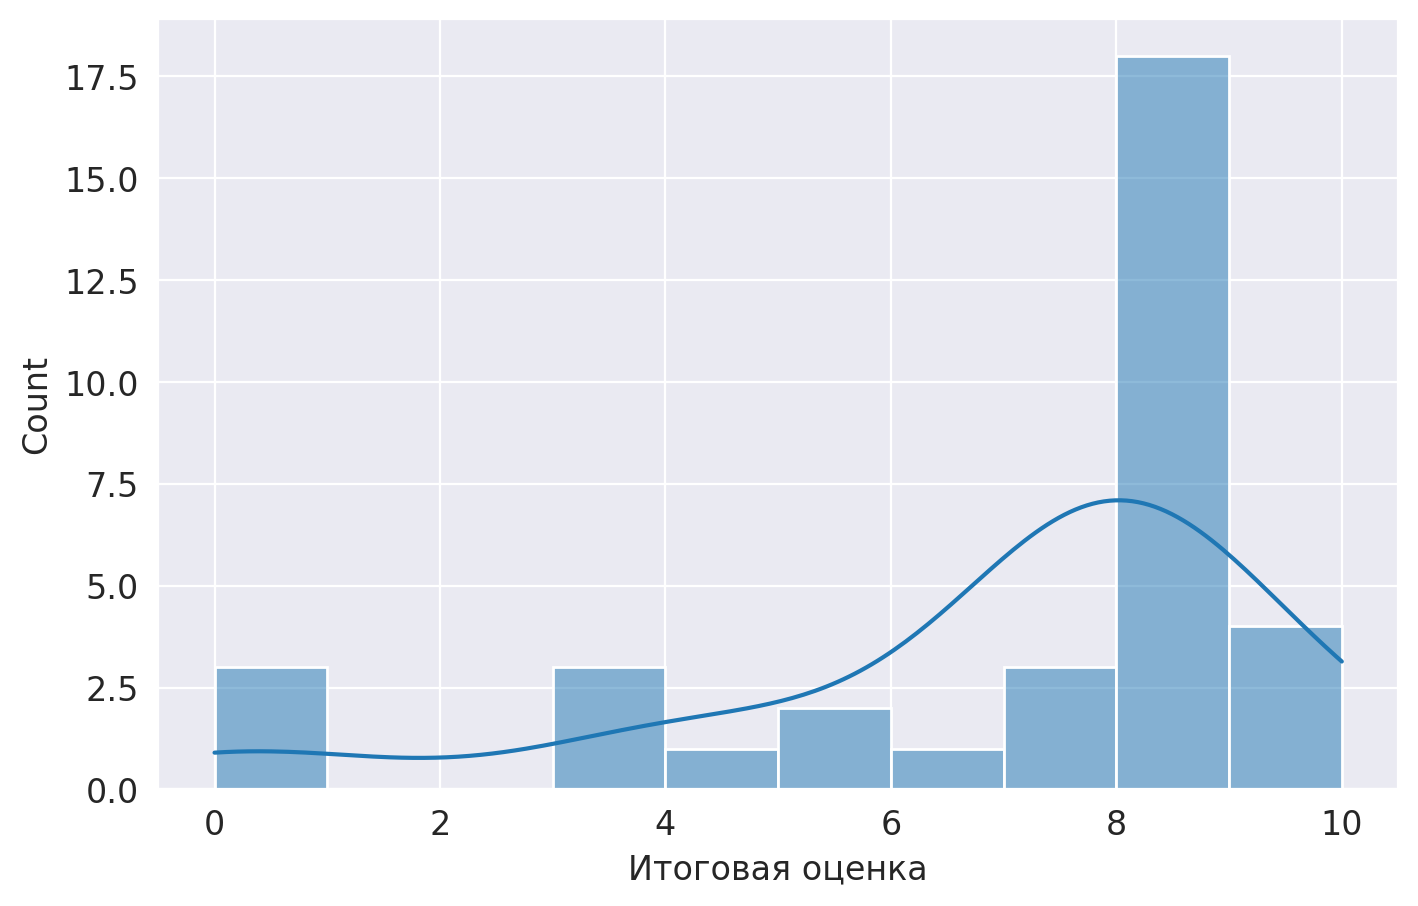

In [26]:
sns.histplot(df['Итоговая оценка'], bins=10, kde=True)

<Axes: xlabel='Итоговая оценка'>

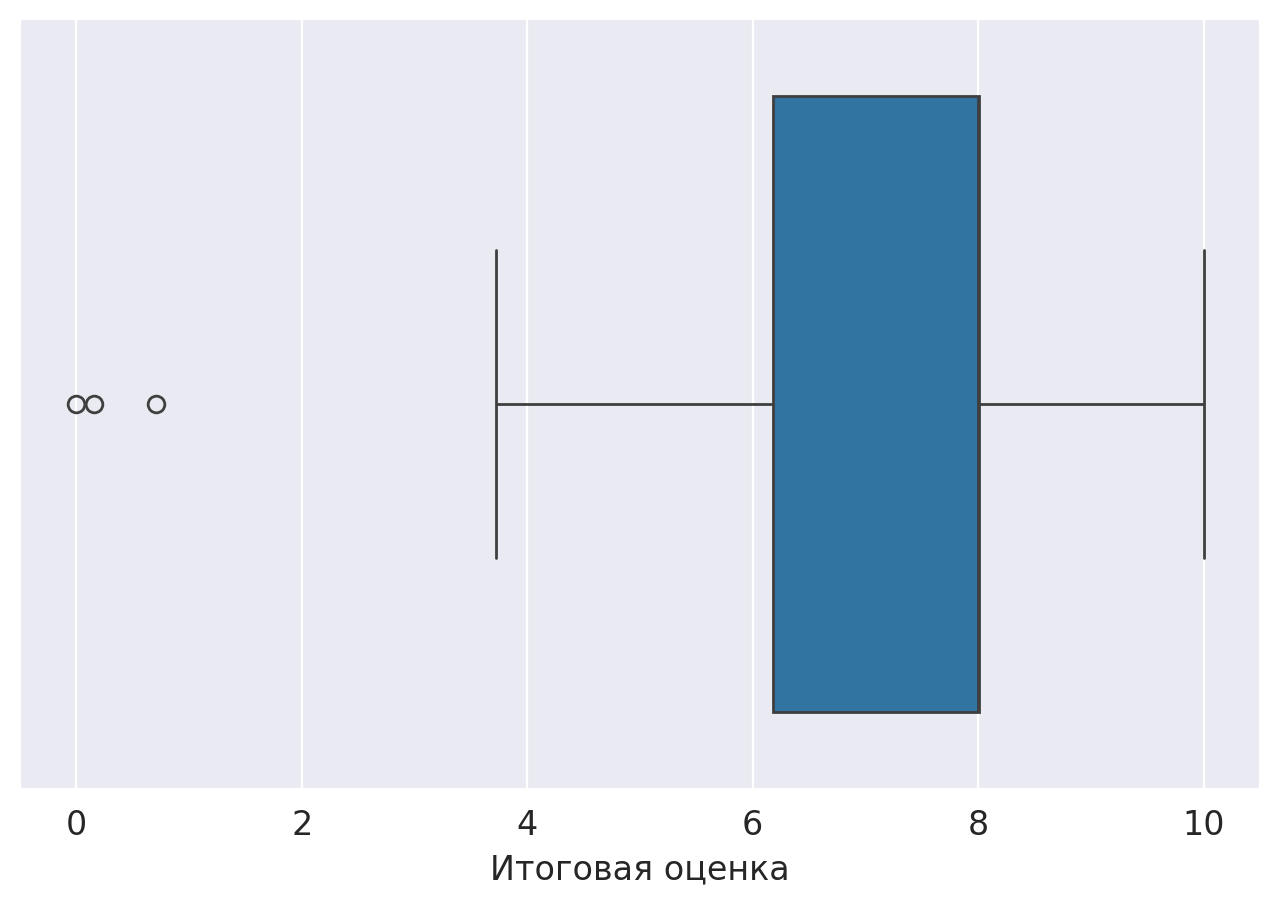

In [27]:
sns.boxplot(x='Итоговая оценка', data=df)

В качестве развлечения давайте построим распредления среди женщин и мужчин.

Самый простой способ для того, чтобы это сделать это соотнести имена с банком женских имен.

Давайте загрузим такой словарь

In [28]:
#это чтобы прочитать с гита файл напрямую
!git clone 'https://github.com/Raven-SL/ru-pnames-list'

Cloning into 'ru-pnames-list'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31 (from 1)
Receiving objects: 100% (31/31), 64.67 KiB | 919.00 KiB/s, done.
Resolving deltas: 100% (11/11), done.


In [29]:
with open ('ru-pnames-list/lists/female_names_rus.txt', 'r') as f:
    c = f.readlines()
    c = set(map(str.strip, c))
    print(c)

{'Всеслава', 'Лира', 'Мадлена', 'Платонида', 'Юлиания', 'Виталия', 'Янсылу', 'Анжелика', 'Мариам', 'Вива', 'Консуэлла', 'Даная', 'Артемия', 'Евдокия', 'Феодора', 'Жозефина', 'Антонина', 'Мартина', 'Ружена', 'Элиана', 'Радана', 'Латафат', 'Малика', 'Минодора', 'Диля', 'Зарема', 'Алфея', 'Эльга', 'Поликсения', 'Мамелфа', 'Амелфа', 'Христя', 'Ефимья', 'Тамара', 'Ксаверта', 'Перегрина', 'Татьяна', 'Эльза', 'Багдагуль', 'Юзефа', 'Адриана', 'Шарлотта', 'Каздоя', 'Гая', 'Виленина', 'Петрина', 'Фомаида', 'Бояна', 'Вилора', 'Галина', 'Радмила', 'Сиотвия', 'Декабрена', 'Дросида', 'Влада', 'Гюзель', 'Элизабет', 'Владилена', 'Тахмина', 'Алексина', 'Транквиллина', 'Карима', 'Алина', 'Доса', 'Даниэла', 'Нина', 'Полактия', 'Дея', 'Анита', 'Люцина', 'Жеральдина', 'Каллиста', 'Видина', 'Мина', 'Неонила', 'Рузана', 'Эра', 'Кама', 'Вита', 'Добромира', 'Хрисия', 'Патриция', 'Адина', 'Евдоксия', 'Матрёна', 'Гульнара', 'Рахиль', 'Секлетинья', 'Ростислава', 'Зинат', 'Эллина', 'Лота', 'Анисья', 'Селена', 'Мир

In [30]:
df['Гендер'] = df['Студент'].apply(lambda x: 'F' if x.split()[1] in c else 'M')

df[['Студент','Гендер']].sample(10)

,Студент,Гендер
2,Ахряпина Мария,F
8,Галимнурова Карина,F
5,Борисенко Семён,M
13,Корчагин Михаил,M
7,Валялов Даниил,M
24,Павлухин Сергей,M
29,Сажина Полина,F
1,Андреянова Софья,F
25,Панин Николай,M
21,Михайлова Лиана,F


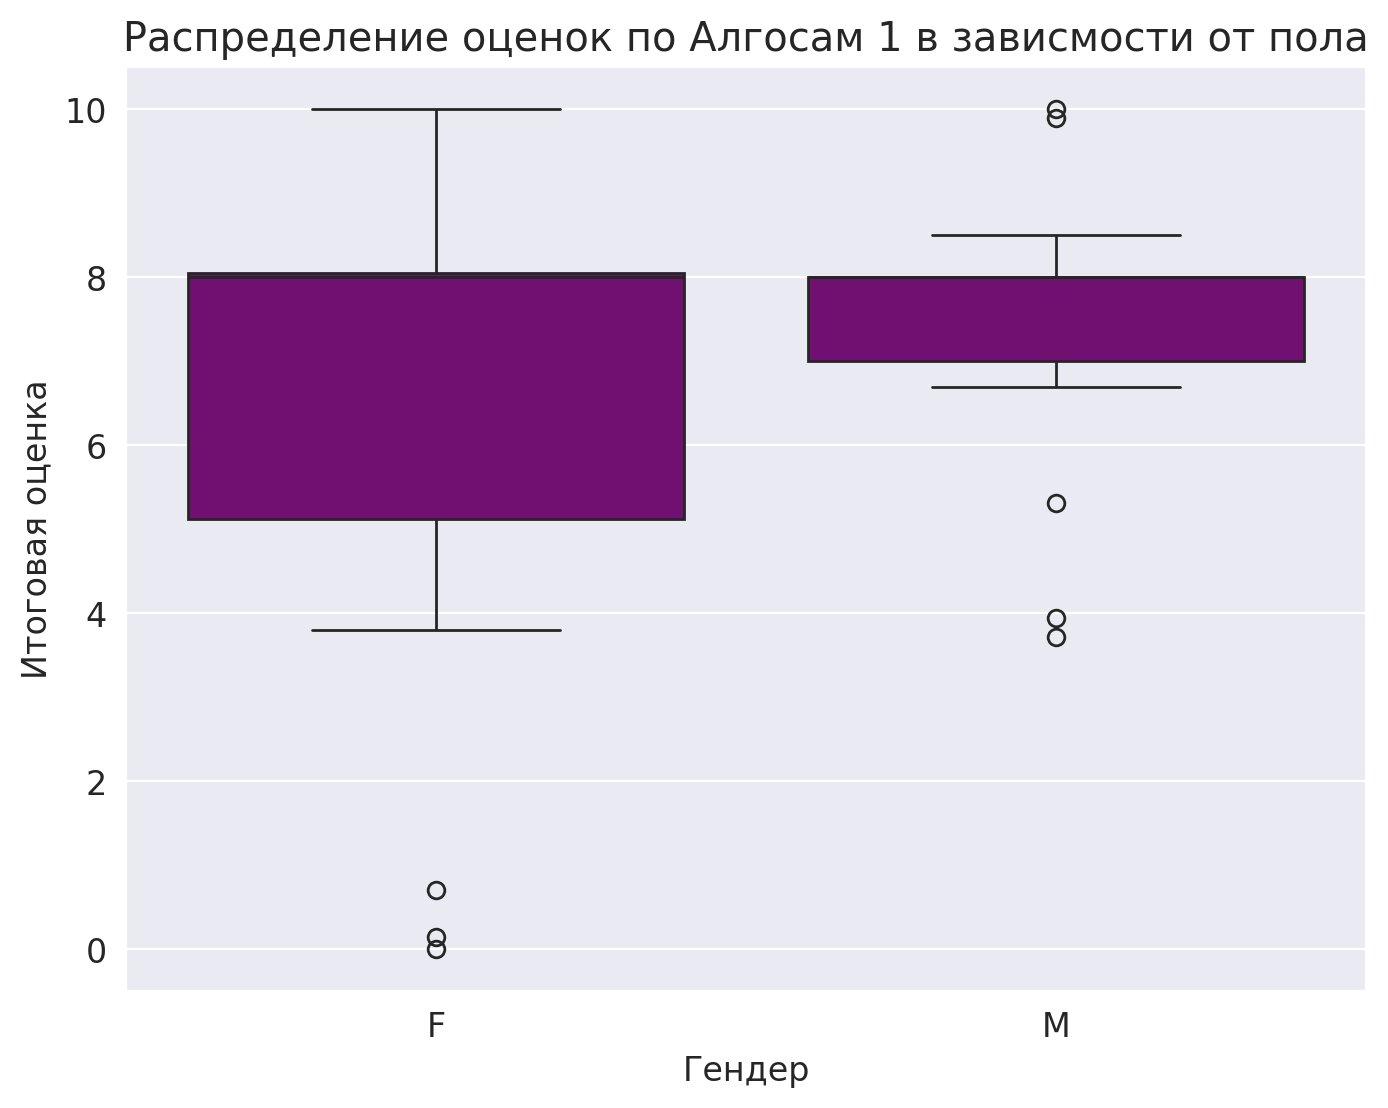

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Гендер', y='Итоговая оценка', data=df, color='purple')
plt.title('Распределение оценок по Алгосам 1 в зависмости от пола')
plt.show()

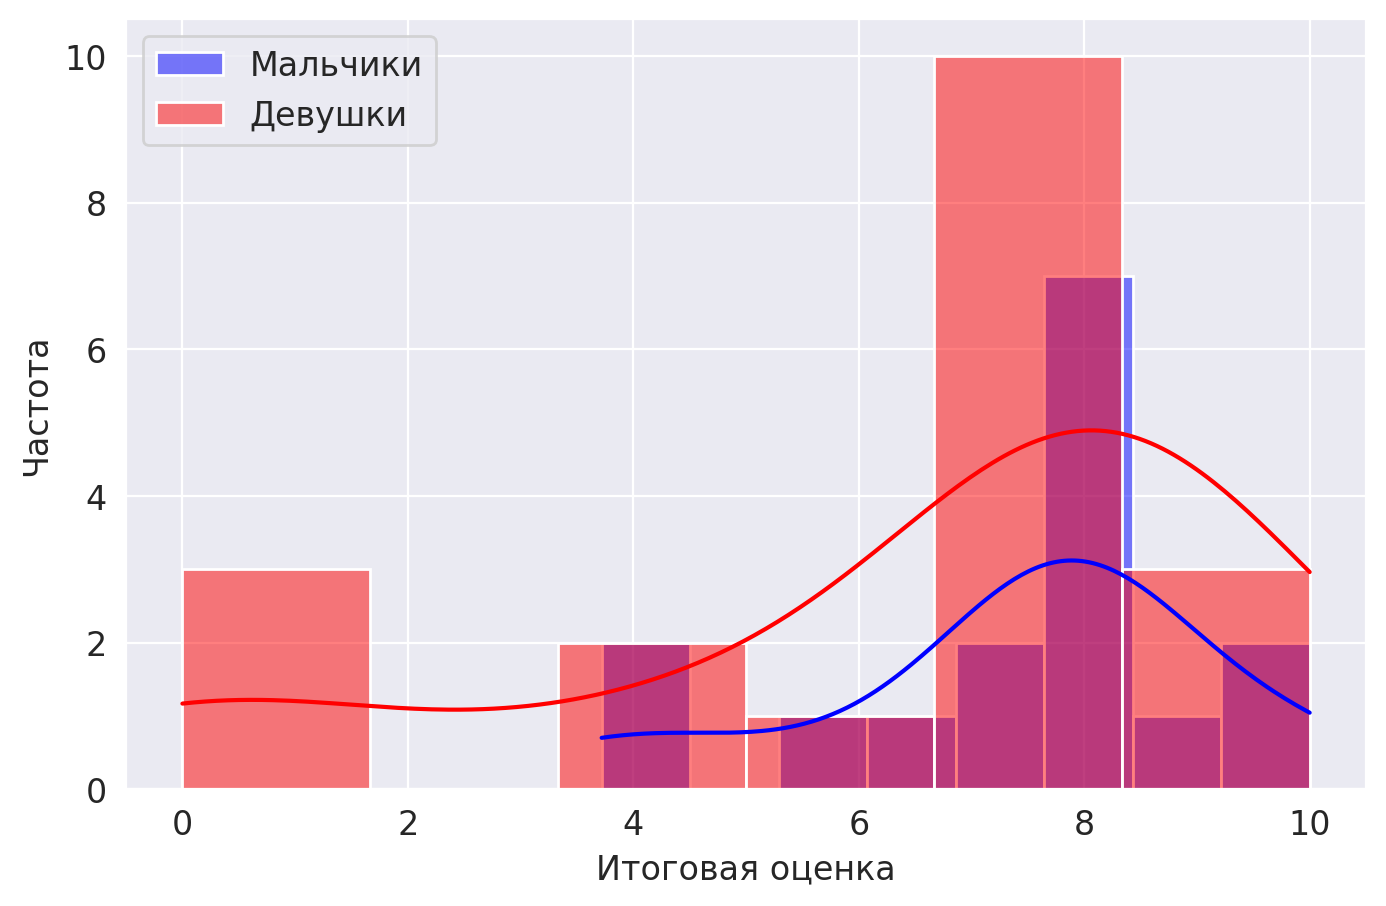

In [32]:
male_data = df[df['Гендер'] == 'M']['Итоговая оценка']
female_data = df[df['Гендер'] == 'F']['Итоговая оценка']

sns.histplot(male_data, kde=True, color='blue', label='Мальчики')
sns.histplot(female_data, kde=True, color='red', label='Девушки')

plt.legend()
plt.xlabel('Итоговая оценка')
plt.ylabel('Частота')

plt.show()

В0о0общем пандас очень крутой, его **нужно** знать

### 4. HTTP

HTTP (HyperText Transfer Protocol) — это протокол, который используется для передачи данных в интернете. Он является основой для обмена данными между клиентом (например, веб-браузером) и сервером. Понимание HTTP важно для скрапинга и парсинга, так как эти процессы часто включают отправку HTTP-запросов и получение HTTP-ответов.

#### Основные понятия HTTP

1. **URL (Uniform Resource Locator)**: Адрес ресурса в интернете. Пример: `https://example.com/path/to/resource`.

2. **HTTP-методы**: Определяют тип операции, которую клиент хочет выполнить над ресурсом. Основные методы:
    - **GET**: Запросить данные с сервера. Используется для получения информации.
    - **POST**: Отправить данные на сервер. Используется для создания новых ресурсов.
    - **PUT**: Обновить существующий ресурс на сервере.
    - **DELETE**: Удалить ресурс на сервере.

3. **HTTP-заголовки**: Метаданные, которые передаются вместе с запросами и ответами. Примеры заголовков:
    - `User-Agent`: Информация о клиенте (например, браузере).
    - `Content-Type`: Тип данных, передаваемых в запросе или ответе (например, `application/json`).
    - `Cookie`: Куки файл

4. **HTTP-статусы**: Код состояния, который сервер возвращает в ответ на запрос. Примеры:
    - `200 OK`: Запрос успешно выполнен.
    - `403 Forbidden`: Запрос содержал корректные данные и был понят сервером, но сервер отказывается выполнять действия
    - `404 Not Found`: Ресурс не найден.
    - `500 Internal Server Error`: Внутренняя ошибка сервера.

#### Пример HTTP-запроса и ответа

**Запрос:**

In [34]:
!curl -vv ya.ru

* Host ya.ru:80 was resolved.
* IPv6: 2a02:6b8::1:56
* IPv4: 213.180.193.56
*   Trying 213.180.193.56:80...
* Connected to ya.ru (213.180.193.56) port 80
> GET / HTTP/1.1
> Host: ya.ru
> User-Agent: curl/8.5.0
> Accept: */*
> 
< HTTP/1.1 302 Moved temporarily
< Accept-CH: Sec-CH-UA-Platform-Version, Sec-CH-UA-Mobile, Sec-CH-UA-Model, Sec-CH-UA, Sec-CH-UA-Full-Version-List, Sec-CH-UA-WoW64, Sec-CH-UA-Arch, Sec-CH-UA-Bitness, Sec-CH-UA-Platform, Sec-CH-UA-Full-Version, Viewport-Width, DPR, Device-Memory, RTT, Downlink, ECT, Width
< Location: http://ya.ru/showcaptcha?cc=1&mt=4BF3ABFD9E8ACAD50974F98CC20C96CBD68FE13CB4658225F8AC128BE898C83707DE46CE9F5B6BA671E309BA1678F248039CF46957D8B7E352DF45D0E3348C4291DA41247E9077C6C845C4C517F74D11B2B8F52B9841029362673287B74D50CD661BEF072BBD457BAEE20FF2A6DE7116C79A2ABC67CA15C404C3738E23841985139A466175AD3F904BEB44F7026812D9382083111084A45EF0167E56D7670E517E42A34A11D0C41290EB4277356AE3ACC909A3CA21BEE01B3CE6F944562382544F4B6FE05867395578CA85AD93838FC795CC2

In [36]:
!curl -v https://rosstat.gov.ru/ -o tmp/rosstat.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0* Host rosstat.gov.ru:443 was resolved.
* IPv6: (none)
* IPv4: 194.226.89.60
*   Trying 194.226.89.60:443...
* Connected to rosstat.gov.ru (194.226.89.60) port 443
* ALPN: curl offers h2,http/1.1
} [5 bytes data]
* TLSv1.3 (OUT), TLS handshake, Client hello (1):
} [512 bytes data]
*  CAfile: /etc/ssl/certs/ca-certificates.crt
*  CApath: /etc/ssl/certs
{ [5 bytes data]
* TLSv1.3 (IN), TLS handshake, Server hello (2):
{ [108 bytes data]
* TLSv1.2 (IN), TLS handshake, Certificate (11):
{ [2713 bytes data]
* TLSv1.2 (IN), TLS handshake, Server key exchange (12):
{ [461 bytes data]
* TLSv1.2 (IN), TLS handshake, Server finished (14):
{ [4 bytes data]
* TLSv1.2 (OUT), TLS handshake, Client key exchange (16):
} [70 bytes data]
* TLSv1.2 (OUT), TLS change cipher

Давайте откроем html и посмотрим из чего он состоит?

Раз все так просто зачем нам отдельная пара по http и прочее?

давайте попробуем посмотреть на другой пример: 

In [ ]:
!curl -v https://dzen.ru/news -o tmp/dzen.html

Почему-то ничего не получилось))

Двайте попробуем это обходить 

### 5. Виды скрепинга

#### 5.1 GUI Скрепинг

In [ ]:
!pip3 install selenium webdriver-manager

Обратить вниание на драйвер

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

url = 'https://dzen.ru/news'

driver.get(url)
time.sleep(10)

html_content = driver.page_source
print(html_content)
html_content.to_file('tmp/dzen.html')

driver.quit()

#### 5.2 Request скрепинг

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.1tv.ru/'

response = requests.get(url)

if response.status_code == 200:
    print(response.content)
    soup = BeautifulSoup(response.content, 'html.parser')
    soup.to_file('tmp/1tv.html')
else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

Парсинг

BeautifulSoup — это библиотека для Python, которая упрощает разбор HTML и XML документов. Она позволяет находить элементы документа с помощью селекторов, CSS или поиска по дереву.

In [ ]:
from bs4 import BeautifulSoup
links = soup.find_all('a')
for link in links:
    print(link.get('href'))

lxml — это библиотека для обработки XML и HTML с поддержкой XPath и XSLT. Она более производительна и мощна, чем BeautifulSoup, но требует более строгого HTML-кода.

In [ ]:
from lxml import html

tree = html.fromstring(response.content)
links = tree.xpath('//a/@href')
for link in links:
    print(link)